# Performance Visualisation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import sys
import os
import glob
import json

In [2]:
def get_data_as_data_frame(path):
    with open(path, 'r') as file:
        raw_data = json.load(file)
    transformed = { item['algorithm']: item['scores'] for item in raw_data}
    df = pd.DataFrame.from_dict(transformed)
    # Reorder the columns
    df = df[['ncc', 'nsc2', 'nsc3', 'nsc5', 'nn', 'pback', 'pmse']]
    return df

def plot_boxplot(path):
    df = get_data_as_data_frame(path)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    sns.boxplot(data=df, ax=ax, showfliers=False)

In [3]:
benchmark_results_dir = os.path.realpath(os.path.join('..', 'benchmark_results'))
paths = glob.glob(os.path.join(benchmark_results_dir, '*.json'))

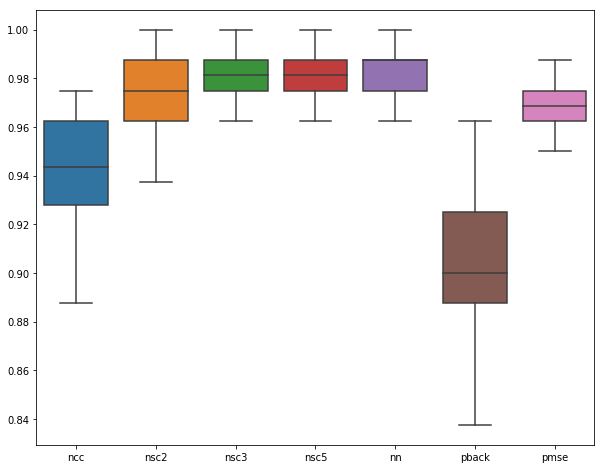

In [4]:
plot_boxplot(paths[0])

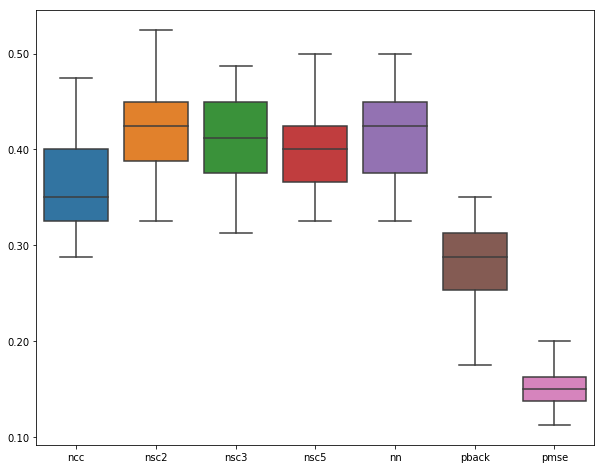

In [5]:
plot_boxplot(paths[1])